In [ ]:
!pip install transformers requests pillow
import requests
from PIL import Image
from io import BytesIO
from transformers import pipeline
from IPython.display import display

Displaying the image...


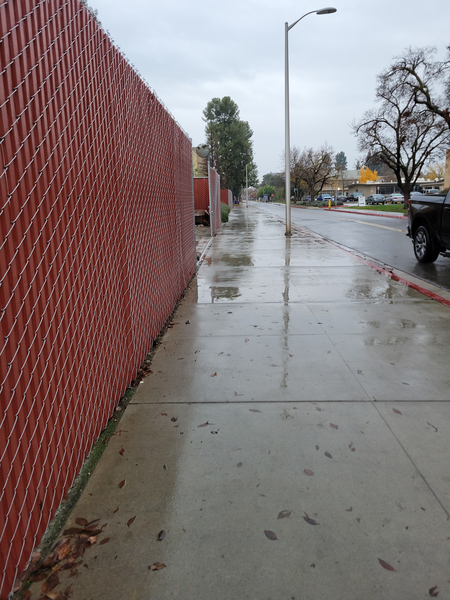

Displaying the image...


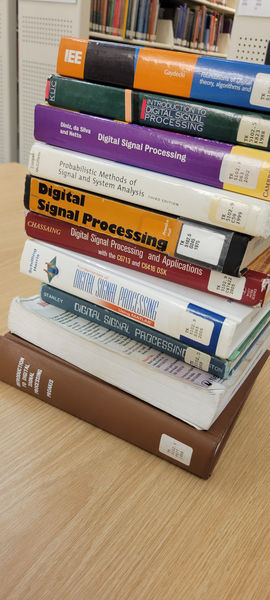

Displaying the image...


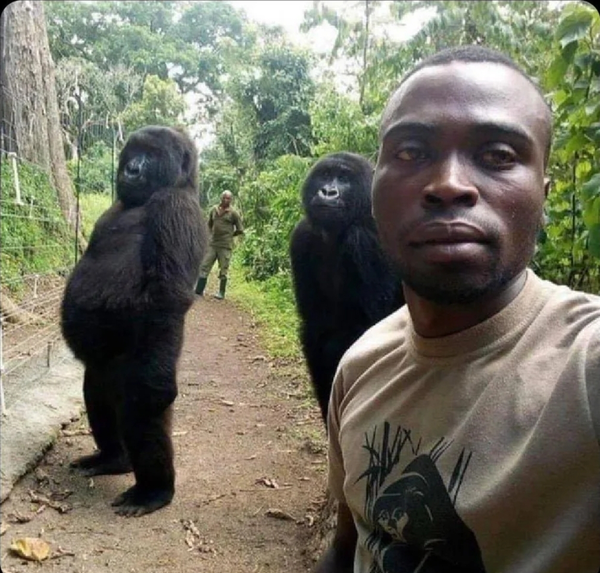

In [36]:

share_link1 = "https://drive.google.com/uc?export=download&id=1aPwfghIy0r8RLexmWLKpHeBrkcxnwI8-"
share_link2 = "https://drive.google.com/uc?export=download&id=1aSSDMEgaSte5cYuVorgOdxkCFeCI5vif"
share_link3 = "https://drive.google.com/uc?export=download&id=1aNFLj88aIXDf-o4v2_HXzilX_tcV2xJk"

response1 = requests.get(share_link1)
image1 = Image.open(BytesIO(response1.content))

response2 = requests.get(share_link2)
image2 = Image.open(BytesIO(response2.content))

response3 = requests.get(share_link3)
image3 = Image.open(BytesIO(response3.content))


max_width = 600

width_percent = max_width / float(image1.size[0])
height_size = int(float(image1.size[1]) * float(width_percent))
image1 = image1.resize((max_width, height_size), Image.Resampling.LANCZOS)

width_percent = max_width / float(image2.size[0])
height_size = int(float(image2.size[1]) * float(width_percent))
image2 = image2.resize((max_width, height_size), Image.Resampling.LANCZOS)

width_percent = max_width / float(image3.size[0])
height_size = int(float(image3.size[1]) * float(width_percent))
image3 = image3.resize((max_width, height_size), Image.Resampling.LANCZOS)


image1 = image1.rotate(270, expand=True)
image2 = image2.rotate(270, expand=True)

print("image1")
display(image1)

print("image2")
display(image2)

print("image3")
display(image3)



In [40]:
#DeepSeek AI
# Load the three different models
model1 = pipeline("image-to-text", model="nlpconnect/vit-gpt2-image-captioning")
model2 = pipeline("image-to-text", model="Salesforce/blip2-flan-t5-xl")
model3 = pipeline("image-to-text", model="unography/blip-large-long-cap")

# List of images
images = [image1, image2, image3]

# Generate and store captions for each image using all three models
captions = []
for i, image in enumerate(images, start=1):
    caption1 = model1(image)
    caption2 = model2(image)
    caption3 = model3(image)
    captions.append((f"Image {i} - Model 1", caption1[0]['generated_text']))
    captions.append((f"Image {i} - Model 2", caption2[0]['generated_text']))
    captions.append((f"Image {i} - Model 3", caption3[0]['generated_text']))

# Print all captions
for caption in captions:
    print(f"Generated Caption for {caption[0]}: {caption[1]}")

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.47.1"
}

Config of the decoder: <class 'transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel'> is overwritten by shared decoder config: GPT2Config {
  "activation_function": "gelu_new",
  "add_cross_attention": true,
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_rang

config.json:   0%|          | 0.00/2.22k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/128k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.96G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/5.81G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/21.0k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

Device set to use cpu
Device set to use cpu


Generated Caption for Image 1 - Model 1: a wall with a red and white wall and a building 
Generated Caption for Image 1 - Model 2: a red fence with a red awning
Generated Caption for Image 1 - Model 3: a scene with a red awning covering a structure, possibly a shelter or shelter, at an urban
Generated Caption for Image 2 - Model 1: a pile of books on a wooden table 
Generated Caption for Image 2 - Model 2: a stack of books on a table
Generated Caption for Image 2 - Model 3: a collection of books, including a few of them in the foreground and a few others in the
Generated Caption for Image 3 - Model 1: a man standing next to a black bear 
Generated Caption for Image 3 - Model 2: a man is taking a selfie with two gorillas
Generated Caption for Image 3 - Model 3: a man standing in the foreground, wearing a t - shirt with a graphic design, and another


# Photo Captioning
## Models
The 3 model I used and in order of their output are as follows:
1. `nlpconnect/vit-gpt2-image-captionin`
2.  `Salesforce/blip2-flan-t5-x`
3.  `unography/blip-large-long-ca`

## Summary
For summarizing my results I want to refer to the 3rd image as its the most "out there". When looking though the results the first model missed the mark It thinks that the gorilla is a bear witch I mean I could see how that happened...

The second model was clear and straight to the point "a man is taking a selfie with two gorillas" witch is exactly what is going on within this picture and another thing to point out from this model being the `blip2-flan...` model it took a very long time to load this model im not sure if it was the size but it took a very very very long time but it seems to be accurate all while brief.

The third model was a finetuned BLIP model and was very verbose for all the images, the caption cuts off but it seems that the model was correct in identyfing the man and his shirt, however the model was quite quick compared to model2 witch took the longest but did the best on all 3 while being brief.

My findings here tell me that the BLIP based models seem to be very popular in this task of image captioning. Im also surprised at the difference in time to load these models compared to their performance it almost feels like it could be exponential.

### reference
Used DeepSeek AI.

